<a href="https://colab.research.google.com/github/jagadeesh01032005/explainable-AI/blob/main/assignment_3_2290.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
zip_path = "/content/Apple.zip"
extract_path = "/content/Apple"


In [ ]:
img_size = (128, 128)
batch_size = 32

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

dataset_dir = extract_path

Now that the data has been extracted, I will modify the code to use the correct directory path.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,   # 20% for validation
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,   # 20% for validation
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Get class names before mapping or normalization
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)
print("Number of classes:", num_classes)

Found 9714 files belonging to 3 classes.
Using 7772 files for training.
Found 9714 files belonging to 3 classes.
Using 1942 files for validation.
Classes: ['Test', 'Train', 'Val']
Number of classes: 3


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.7558 - loss: 7.4195 - val_accuracy: 0.8028 - val_loss: 0.6164
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 255s 994ms/step - accuracy: 0.8053 - loss: 0.6233 - val_accuracy: 0.8028 - val_loss: 0.5906
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.8031 - loss: 0.6112 - val_accuracy: 0.8028 - val_loss: 0.6115
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.8048 - loss: 0.6035 - val_accuracy: 0.8028 - val_loss: 0.5763
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.8044 - loss: 0.5929 - val_accuracy: 0.8028 - val_loss: 0.5939
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8031 - loss: 0.5866 - val_accuracy: 0.8028 - val_loss: 0.5840
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.8022 - loss: 0.5698 - val_accuracy: 0.8028 - val_loss: 0.5889
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.8028 - loss: 0.5727 - val_a

In [ ]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Accuracy')

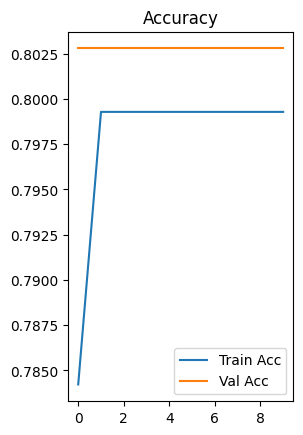

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")


Text(0.5, 1.0, 'Loss')

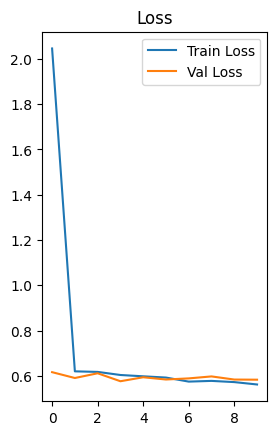

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")


In [ ]:
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
def predict_leaf(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    return train_ds.class_names[class_idx]

In [ ]:
# print(predict_leaf("/content/Apple/Apple___Black_rot/image_001.jpg"))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

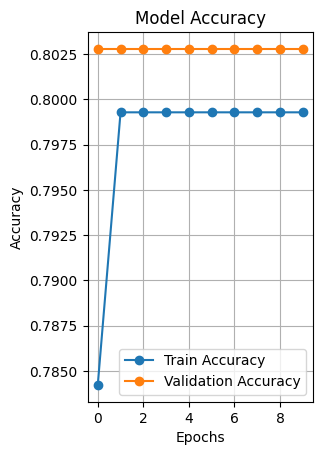

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy", marker='o')
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

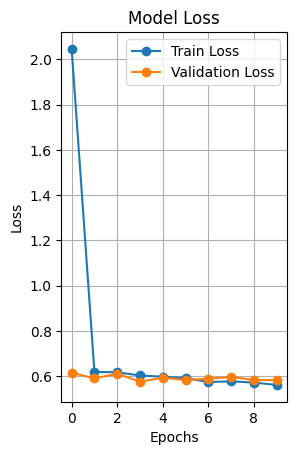

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss", marker='o')
plt.plot(history.history["val_loss"], label="Validation Loss", marker='o')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [ ]:
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class_names = train_ds.class_names

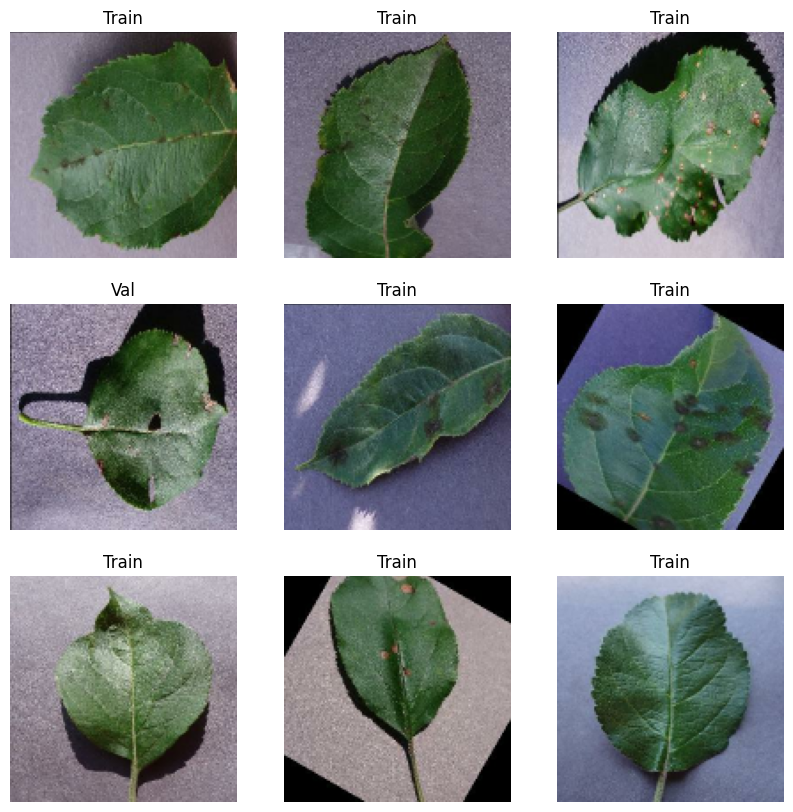

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from lime.lime_tabular import LimeTabularExplainer


Now that the CSV file has been extracted, we can load it into a pandas DataFrame.

In [ ]:
df = pd.read_csv("/content/acc_16.csv.zip")

In [ ]:
print(df.columns.tolist())


['CASENUM', 'PSU', 'PJ', 'STRATUM', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'NUM_INJ', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'HARM_EV', 'ALCOHOL', 'MAX_SEV', 'MAN_COLL', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2', 'WEATHER', 'SCH_BUS', 'INT_HWY', 'CF1', 'CF2', 'CF3', 'WKDY_IM', 'HOUR_IM', 'MINUTE_IM', 'EVENT1_IM', 'MANCOL_IM', 'RELJCT1_IM', 'RELJCT2_IM', 'LGTCON_IM', 'WEATHR_IM', 'MAXSEV_IM', 'NO_INJ_IM', 'ALCHL_IM', 'URBANICITY', 'REGION', 'PSUSTRAT', 'PSU_VAR', 'WEIGHT']


In [ ]:
cols = ["Severity", "Temperature(F)", "Humidity(%)",
        "Visibility(mi)", "Wind_Speed(mph)", "Distance(mi)"]


In [ ]:
possible_targets = ["Severity", "Accident_Severity", "Target", "severity"]
target_col = None
for col in df.columns:
    if col in possible_targets:
        target_col = col
        break

In [ ]:
print("Shape:", df.shape)
print("First rows:\n", df.head())

Shape: (46511, 51)
First rows:
         CASENUM  PSU   PJ  STRATUM  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  \
0  201600014311   44  388        9         2         2         0     0   
1  201600014315   44  388        8         2         2         0     0   
2  201600014316   44  388        5         1         1         0     0   
3  201600014335   44  388       10         2         2         0     0   
4  201600014586   24  170        2         1         1         0     1   

   PERMVIT  PERNOTMVIT  ...  LGTCON_IM  WEATHR_IM  MAXSEV_IM  NO_INJ_IM  \
0        2           0  ...          1          1          0          0   
1        4           0  ...          3          1          1          4   
2        1           0  ...          3          1          3          1   
3        2           0  ...          3          3          0          0   
4        1           1  ...          1          1          2          1   

   ALCHL_IM  URBANICITY  REGION  PSUSTRAT  PSU_VAR      WEIGHT  
0      

In [ ]:
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['CASENUM', 'PSU', 'PJ', 'STRATUM', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'NUM_INJ', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'HARM_EV', 'ALCOHOL', 'MAX_SEV', 'MAN_COLL', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2', 'WEATHER', 'SCH_BUS', 'INT_HWY', 'CF1', 'CF2', 'CF3', 'WKDY_IM', 'HOUR_IM', 'MINUTE_IM', 'EVENT1_IM', 'MANCOL_IM', 'RELJCT1_IM', 'RELJCT2_IM', 'LGTCON_IM', 'WEATHR_IM', 'MAXSEV_IM', 'NO_INJ_IM', 'ALCHL_IM', 'URBANICITY', 'REGION', 'PSUSTRAT', 'PSU_VAR', 'WEIGHT']


In [ ]:
target_col = "SEVERITY"

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df.columns = [c.upper() for c in df.columns]
target_col = target_col.upper()

In [ ]:
feature_candidates = ["TEMPERATURE(F)", "HUMIDITY(%)",
                      "VISIBILITY(MI)", "WIND_SPEED(MPH)", "DISTANCE(MI)"]


In [ ]:
available_features = [c for c in feature_candidates if c in df.columns]

In [ ]:
['ID', 'Severity', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)', 'Distance(mi)', ...]


['ID',
 'Severity',
 'Temperature(F)',
 'Humidity(%)',
 'Wind_Speed(mph)',
 'Distance(mi)',
 Ellipsis]

In [ ]:

['CASENUM', 'PSU', 'PJ', 'STRATUM', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'NUM_INJ', ... , 'WEIGHT']


['CASENUM',
 'PSU',
 'PJ',
 'STRATUM',
 'VE_TOTAL',
 'VE_FORMS',
 'PVH_INVL',
 'PEDS',
 'PERMVIT',
 'PERNOTMVIT',
 'NUM_INJ',
 Ellipsis,
 'WEIGHT']

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/acc_16.csv.zip")


df.columns = df.columns.str.strip()

target_col = "MAX_SEV"


X = df.drop(columns=[target_col])
X = X.select_dtypes(include=[np.number])
y = df[target_col]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target classes:\n", y.value_counts())


Features shape: (46511, 50)
Target shape: (46511,)
Target classes:
 MAX_SEV
0    21383
1    10962
2     7409
3     4653
4      903
9      852
5      332
8       15
6        2
Name: count, dtype: int64
